In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from plot_config import set_matplotlib, set_seaborn

df = pd.read_csv("../data/processed/accidents.csv", dtype={0: str, 53: str})
df.head(3)

,numero_boletim,tipo_acidente,desc_tipo_acidente,cod_tempo,desc_tempo,cod_pavimento,pavimento,cod_regional,desc_regional,origem_boletim,...,tipo_logradouro,nome_logradouro,tipo_bairro,descricao_tipo_bairro,Nº_imovel,Bairro,Data_logradouro,Hora_logradouro,longitude,latitude
0,2019026821139001,H01002,ABALROAMENTO COM VITIMA,0,NAO INFORMADO,0,NAO INFORMADO,25,PAMPULHA,POLICIA MILITAR,...,RUA,ANTONIO ALEIXO,B,BAIRRO,0,Serrano,2019-06-07,13:38:00,NaN,NaN
1,2019026821139001,H01002,ABALROAMENTO COM VITIMA,0,NAO INFORMADO,0,NAO INFORMADO,25,PAMPULHA,POLICIA MILITAR,...,RUA,DA BAHIA,B,BAIRRO,0,Centro,2019-06-07,13:38:00,NaN,NaN
2,2019026821139001,H01002,ABALROAMENTO COM VITIMA,0,NAO INFORMADO,0,NAO INFORMADO,25,PAMPULHA,POLICIA MILITAR,...,RUA,ANTONIO ALEIXO,B,BAIRRO,0,Serrano,2019-06-07,13:38:00,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456750 entries, 0 to 456749
Data columns (total 59 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   numero_boletim          456750 non-null  object 
 1   tipo_acidente           456750 non-null  object 
 2   desc_tipo_acidente      456750 non-null  object 
 3   cod_tempo               456750 non-null  int64  
 4   desc_tempo              456750 non-null  object 
 5   cod_pavimento           456750 non-null  int64  
 6   pavimento               456750 non-null  object 
 7   cod_regional            456750 non-null  int64  
 8   desc_regional           445757 non-null  object 
 9   origem_boletim          456750 non-null  object 
 10  velocidade_permitida    456750 non-null  int64  
 11  indicador_fatalidade    456750 non-null  object 
 12  valor_ups               456750 non-null  int64  
 13  descricao_ups           456750 non-null  object 
 14  Data                

In [3]:
set_matplotlib()
set_seaborn()

In [4]:
total_acidentes = df['numero_boletim'].nunique()
print(f'Total de acidentes: {total_acidentes}')

Total de acidentes: 71464


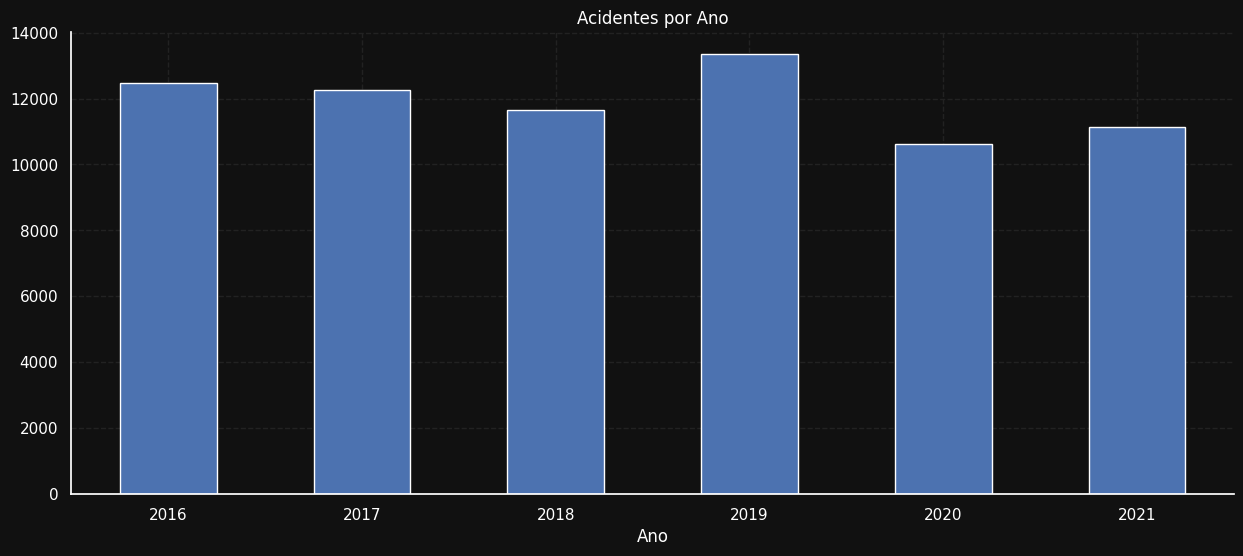

In [5]:
acidentes_por_ano = df.groupby('Ano')['numero_boletim'].nunique()
acidentes_por_ano.plot(kind='bar', title='Acidentes por Ano')
plt.xticks(rotation=0);

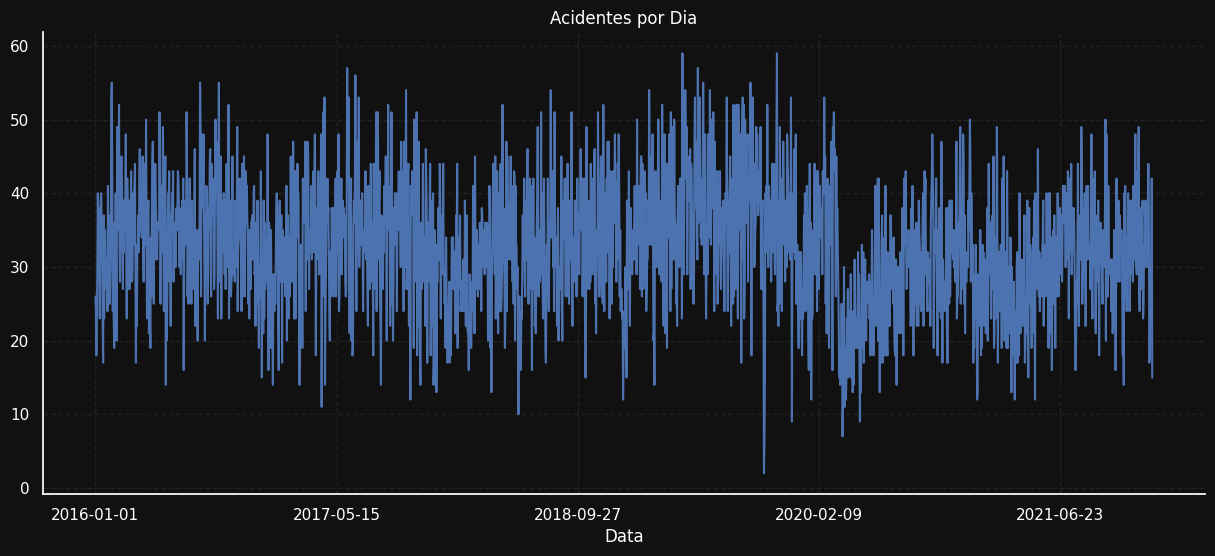

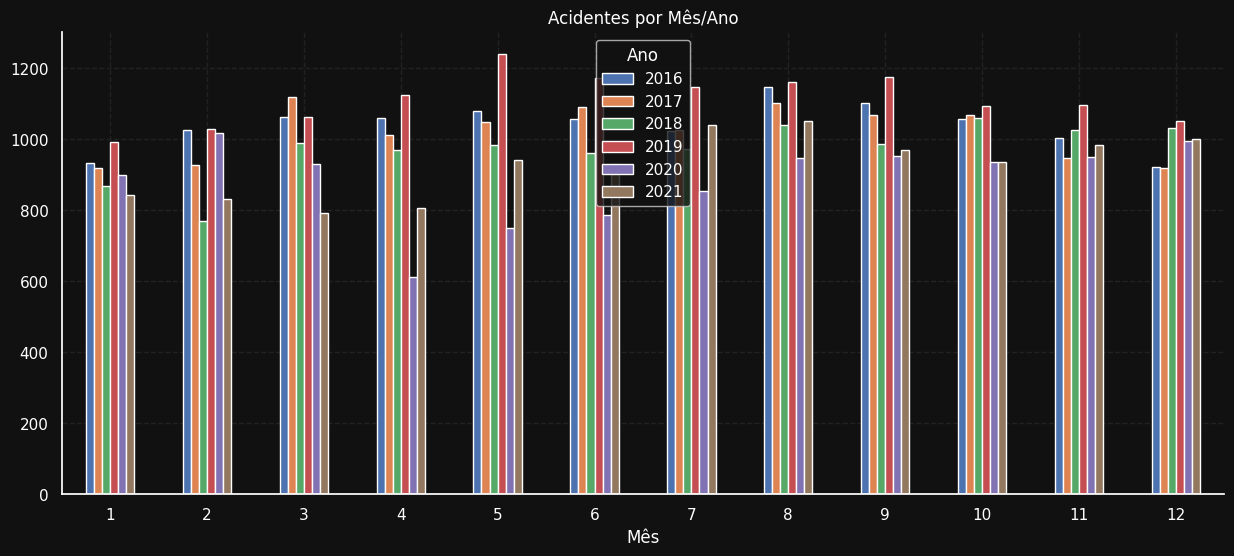

In [6]:
acidentes_por_dia = df.groupby('Data')['numero_boletim'].nunique()
acidentes_por_dia.plot(title='Acidentes por Dia')

acidentes_por_mes = df.groupby(['Ano', 'Mês'])['numero_boletim'].nunique()
acidentes_por_mes.unstack().T.plot(kind='bar', title='Acidentes por Mês/Ano')
plt.xticks(rotation=0);

In [7]:
total_envolvidos = df['numero_envolvido'].nunique()
print(f'Total de pessoas envolvidas: {total_envolvidos}')

Total de pessoas envolvidas: 40


In [8]:
total_mortes = df[df['indicador_fatalidade'] == 'SIM']['numero_boletim'].nunique()
print(f'Total de mortes: {total_mortes}')

Total de mortes: 640


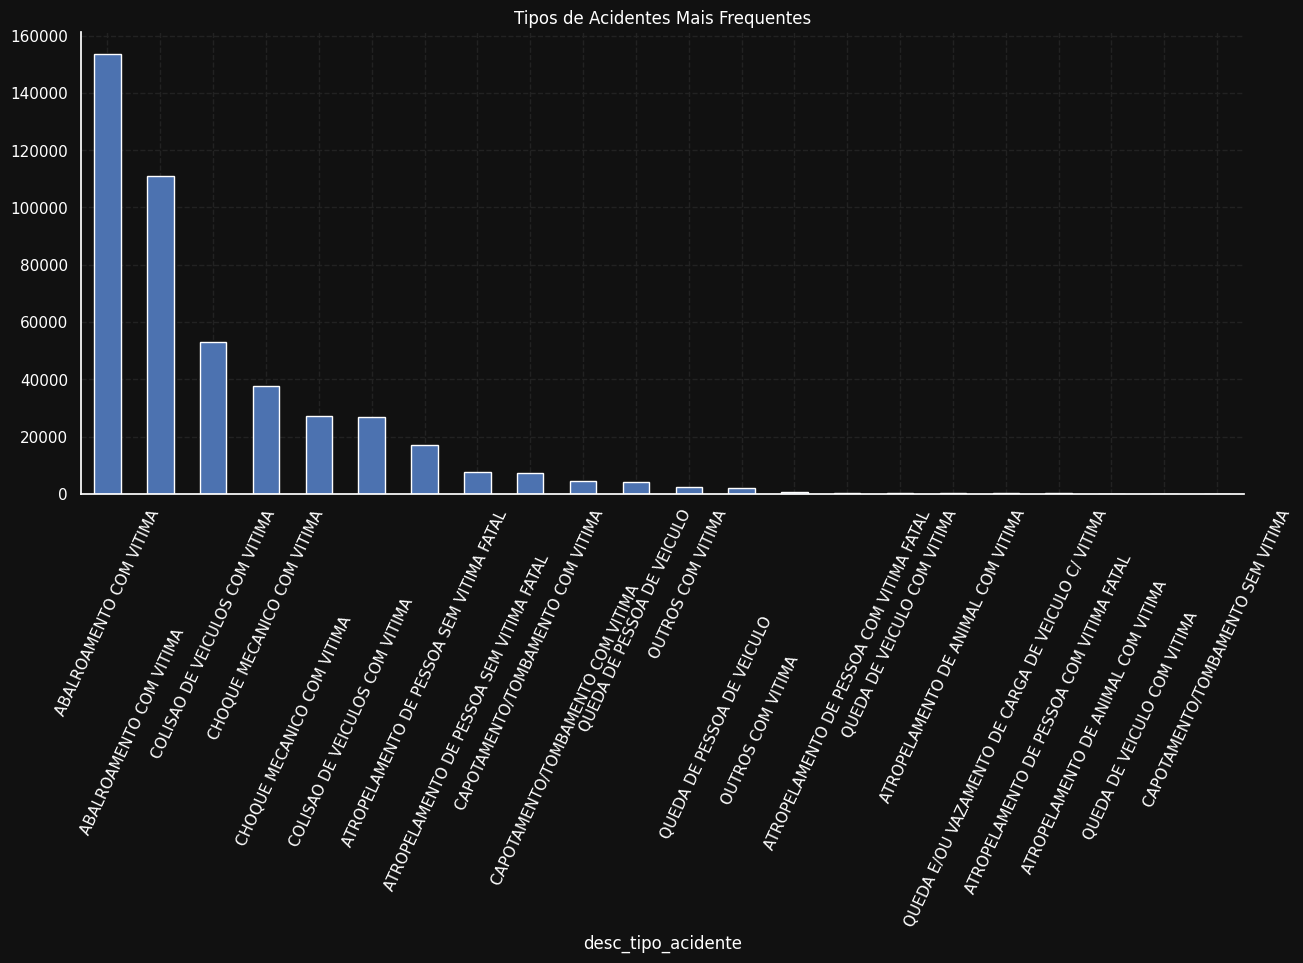

In [9]:
df['desc_tipo_acidente'].value_counts().plot(kind='bar', title='Tipos de Acidentes Mais Frequentes')
plt.xticks(rotation=65);

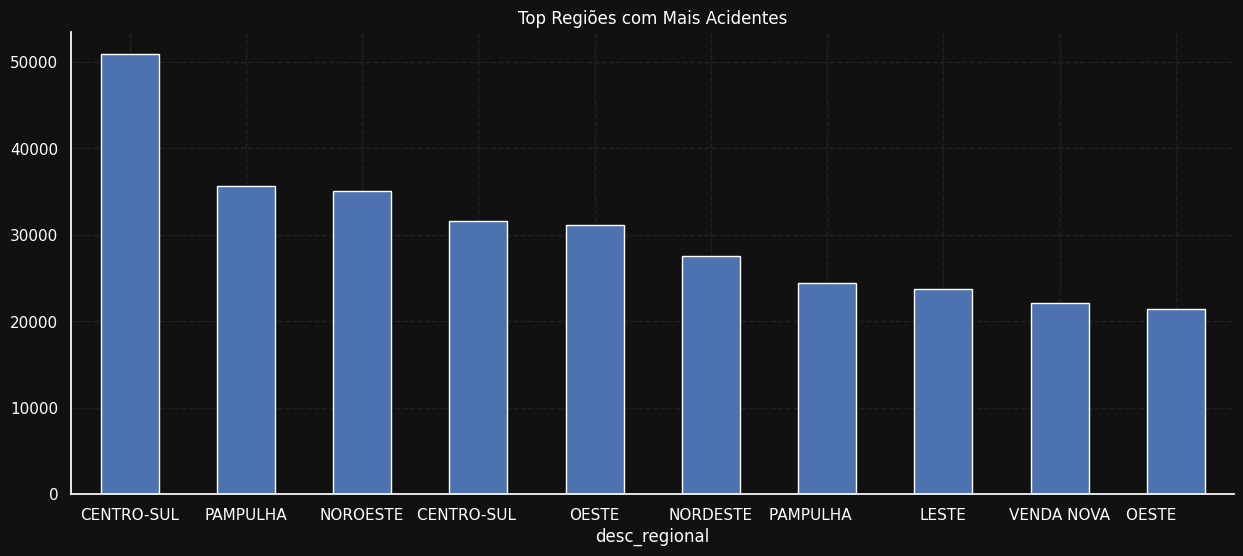

In [10]:
df['desc_regional'].value_counts().head(10).plot(kind='bar', title='Top Regiões com Mais Acidentes')
plt.xticks(rotation=0);

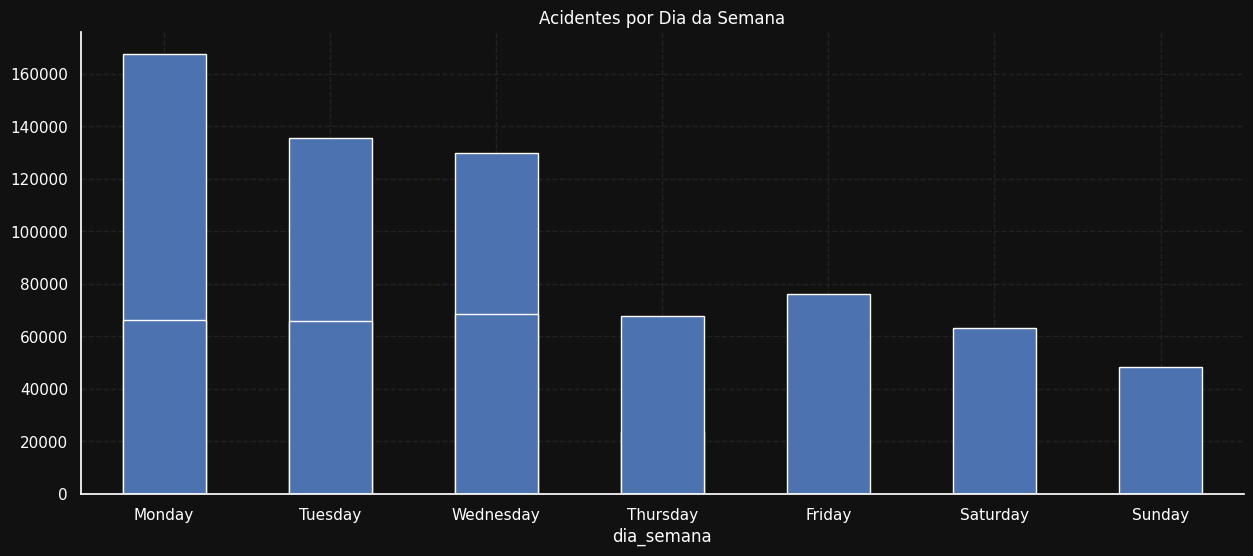

In [11]:
df['Faixa_hora'].value_counts().plot(kind='bar', title='Acidentes por Faixa Horária')

df['Data'] = pd.to_datetime(df['Data'])
df['dia_semana'] = df['Data'].dt.day_name()

df['dia_semana'].value_counts().loc[
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
].plot(kind='bar', title='Acidentes por Dia da Semana')
plt.xticks(rotation=0);

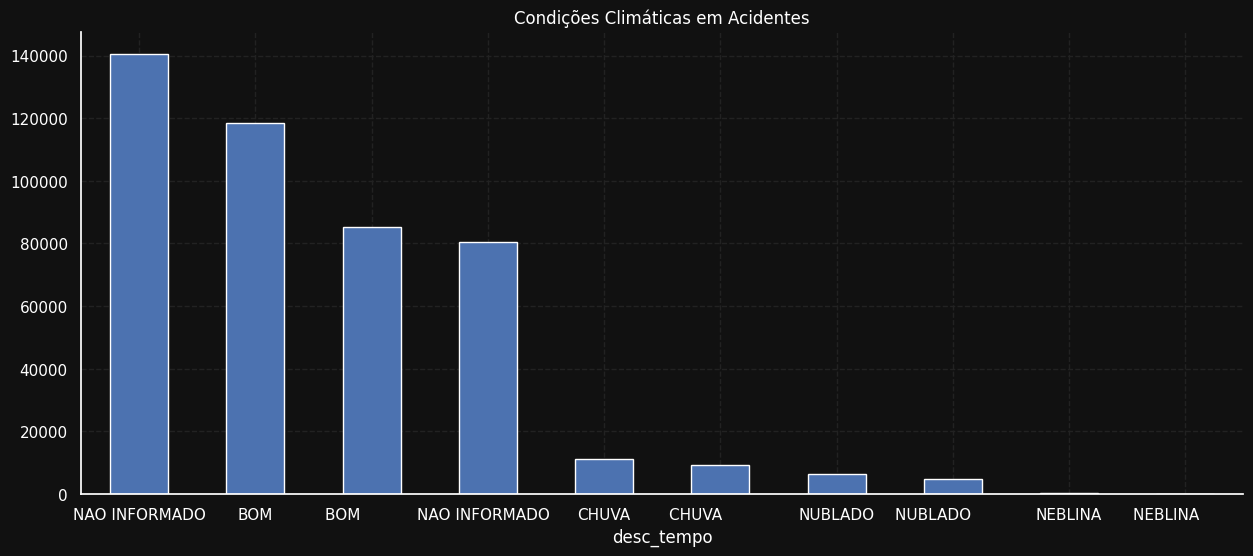

In [12]:
df['desc_tempo'].value_counts().plot(kind='bar', title='Condições Climáticas em Acidentes')
plt.xticks(rotation=0);

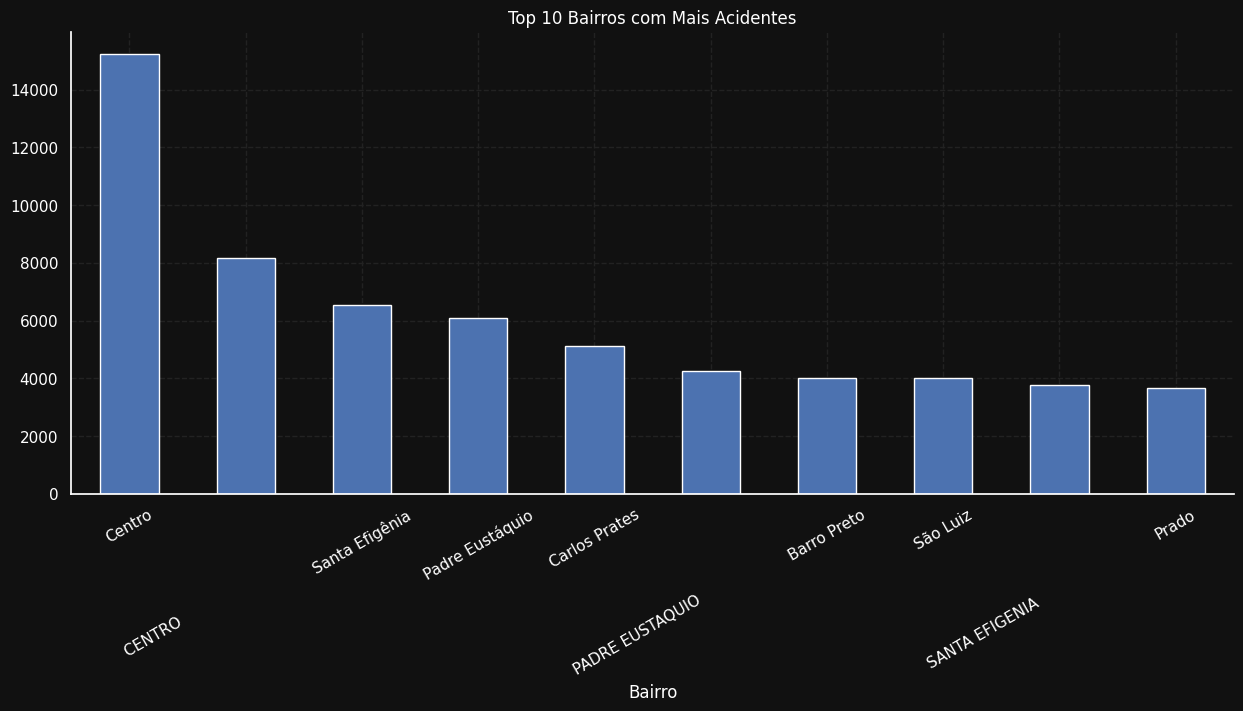

In [13]:
df['Bairro'].value_counts().head(10).plot(kind='bar', title='Top 10 Bairros com Mais Acidentes')
plt.xticks(rotation=30);

In [14]:
media_idade = df[df['condutor'] == 'S']['Idade'].mean()
print(f'Média de idade dos condutores: {media_idade:.2f}')

Média de idade dos condutores: 34.41


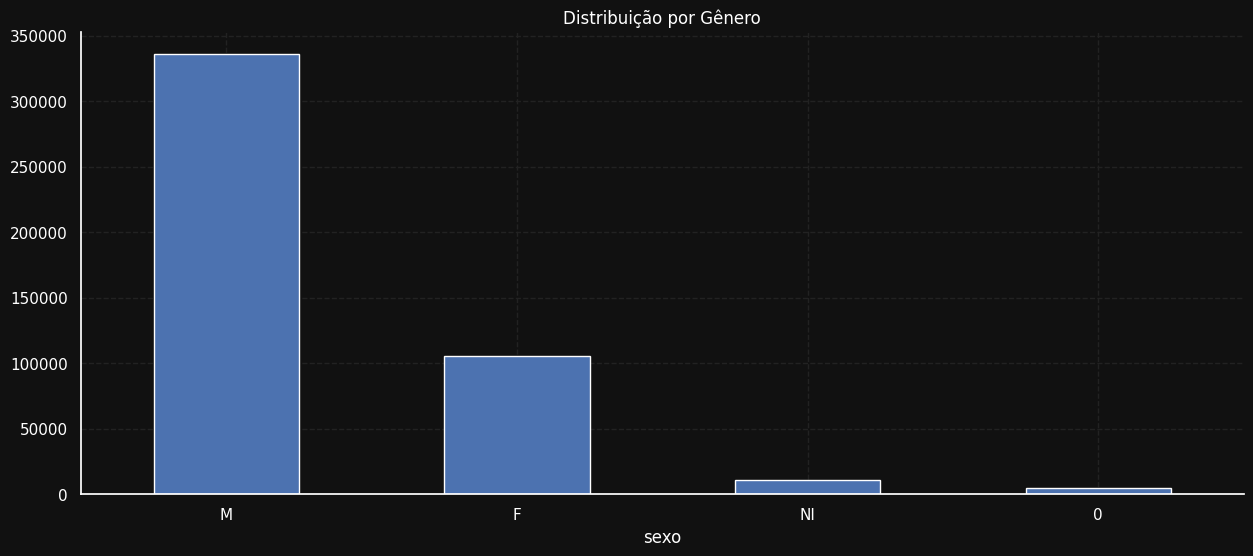

In [15]:
df['sexo'].value_counts().plot(kind='bar', title='Distribuição por Gênero')
plt.xticks(rotation=0);

In [16]:
sem_habilitacao = df[(df['condutor'] == 'S') & (df['descricao_habilitacao'].isna())]
print(f'Total de condutores sem habilitação: {sem_habilitacao.shape[0]}')

Total de condutores sem habilitação: 69023


In [17]:
sem_cinto = df[df['cinto_seguranca'].str.lower() == 'não']
print(f'Acidentes sem uso do cinto: {sem_cinto.shape[0]}')

Acidentes sem uso do cinto: 98182


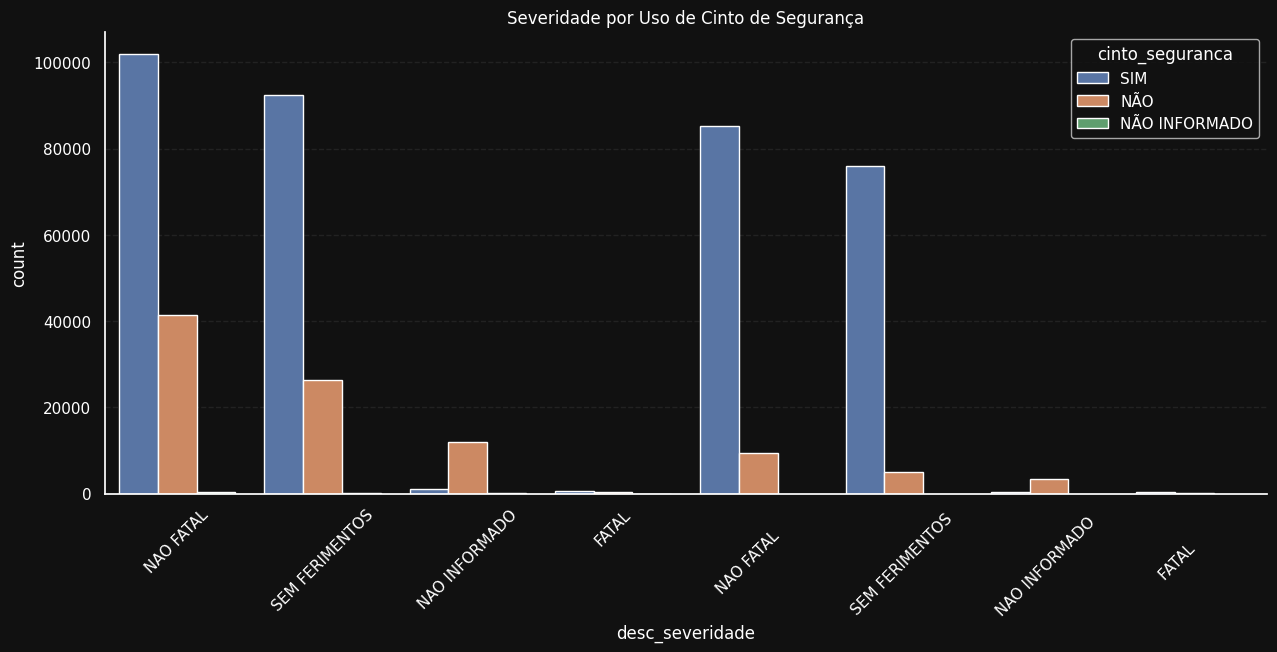

In [18]:
sns.countplot(data=df, x='desc_severidade', hue='cinto_seguranca')
plt.title('Severidade por Uso de Cinto de Segurança')
plt.xticks(rotation=45)
plt.show()

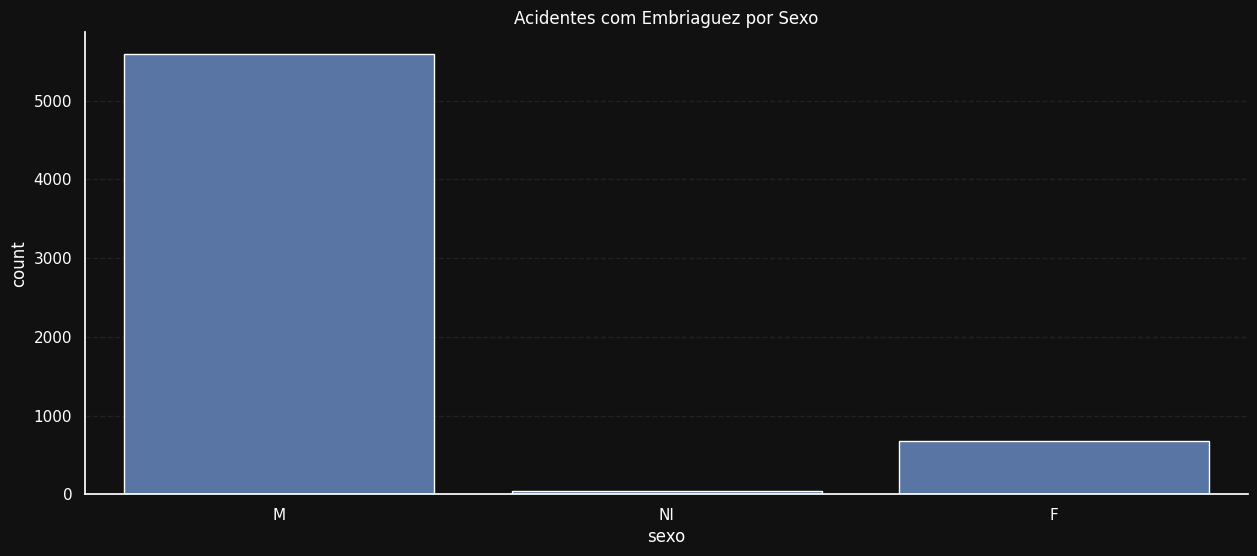

In [26]:
sns.countplot(data=df[df['Embreagues'] == 'SIM'], x='sexo')
plt.title('Acidentes com Embriaguez por Sexo')
plt.show()

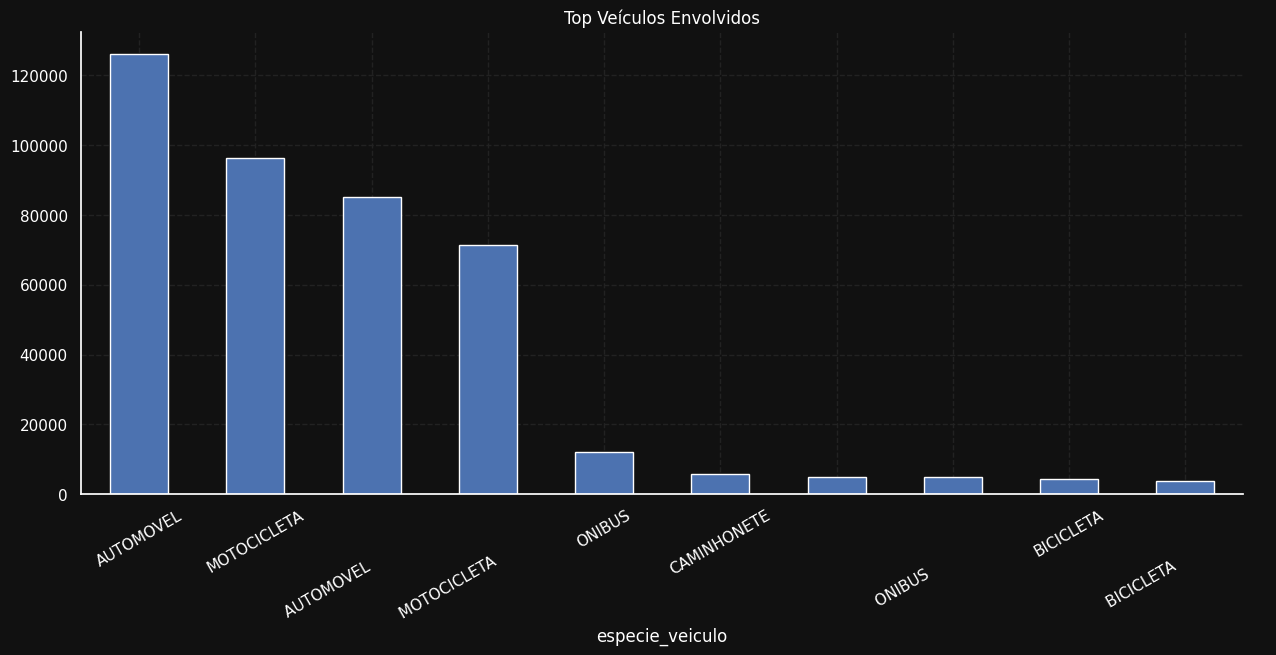

In [20]:
df['especie_veiculo'].value_counts().head(10).plot(kind='bar', title='Top Veículos Envolvidos')
plt.xticks(rotation=30);

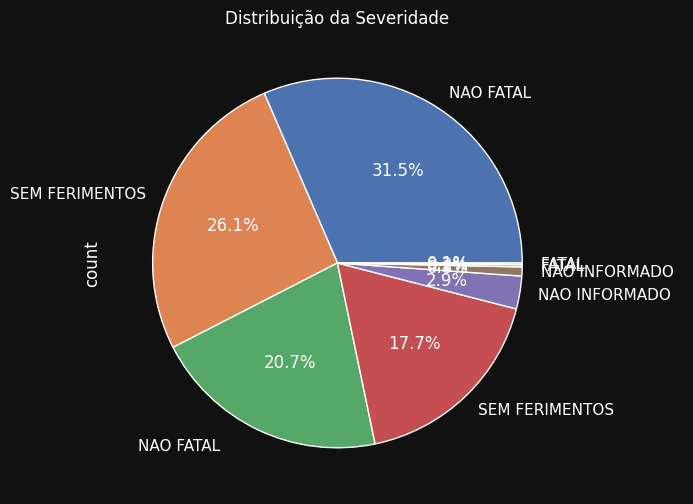

In [21]:
df['desc_severidade'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribuição da Severidade');

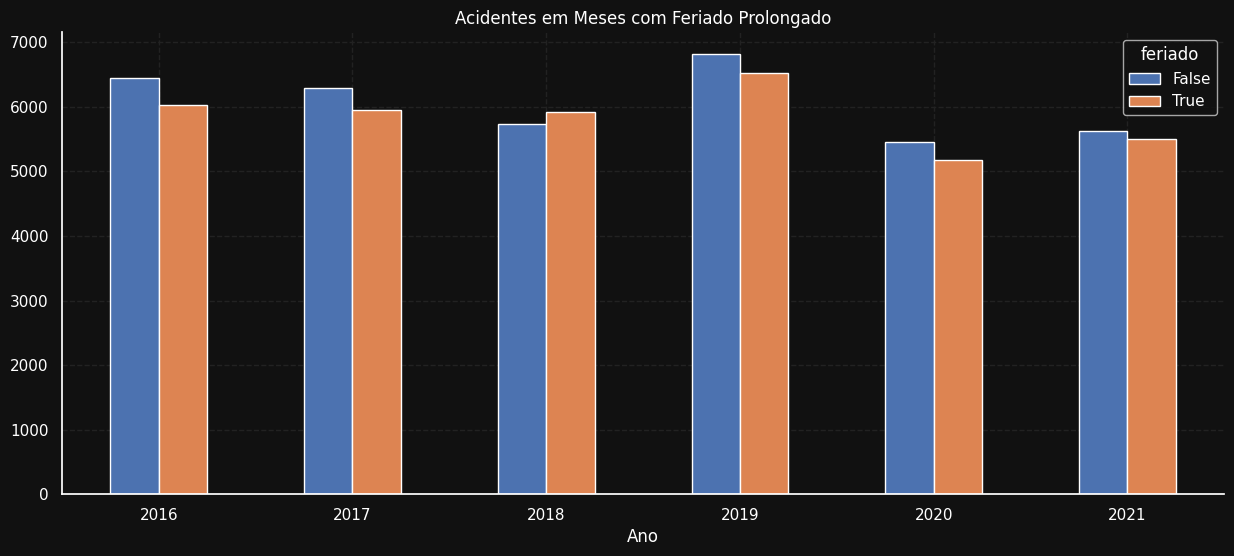

In [22]:
meses_feriados = [1, 4, 6, 10, 11, 12]
df['feriado'] = df['Mês'].isin(meses_feriados)

df.groupby(['Ano', 'feriado'])['numero_boletim'].nunique().unstack().plot(kind='bar', title='Acidentes em Meses com Feriado Prolongado')
plt.xticks(rotation=0);